 
## <font color = 'green'>Machine learning prediction project on the California housing dataset<font>
### <font color = 'green'>By: Nnebuo Augusta <font>

In [187]:
#importing my libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
Cal_H=pd.read_csv("housing.csv")
Cal_H.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [37]:
Cal_H.rename(columns={"median_house_value":"House_Price"},inplace=True)

Cal_H.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,House_Price,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


"""This is the California house dataset. It contains 10 columns and each column contains info about the houses in California per block.It has approxmately 20639 rows
Soo basically, this project is a machine learning prediction project, to predict the prices of future house blocks
based on the available features the have. Given to the fact that our data is not exactly a clean data,
there will be a bit of preprocessing along the way, also a little exploratory analysis to better 
understand the data we have at hand. From the look of the data, there would be a need fopr feature scaling too
soo just sit down and enjoy the ride. I promise to add lil comments here and there to help you flow 
with the project.    Gracias!"""

In [38]:
Cal_H.head(10)




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,House_Price,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [39]:
Cal_H.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,House_Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


 From this summary statistics, we get to know that oldest housing block is 52 years and the youngest is just a year old. Each block contains atleast 1 household|family unit.
The cheapest housing block has a price value of about 15000 dollars, and the median income of a family in a housing block ios 5000 dollars.

In [43]:
## Data preprocessing

Cal_H.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
House_Price             0
ocean_proximity         0
dtype: int64

In [51]:
# The only missing values we have are in the total bedrooms column, lets check why



#pd.set_option('display.height', Cal_H)
pd.set_option('display.max_rows', None)

Cal_H.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,House_Price,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


from analysis, i saw that the values missing in the total bedroom column are missing at random, with no pattern. this could be as a result of absence of the data at the point of collection.  to fill i will fill forward.

In [52]:
Cal_H.fillna(method="ffill", inplace=True)

In [57]:
Cal_H.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
House_Price           0
ocean_proximity       0
dtype: int64

In [59]:
Cal_H.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
House_Price           20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


9 out of my 10 columns contain numerical data. Tmhis is great cause ML works best with numerical data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E5A025978>,
      dtype=object)

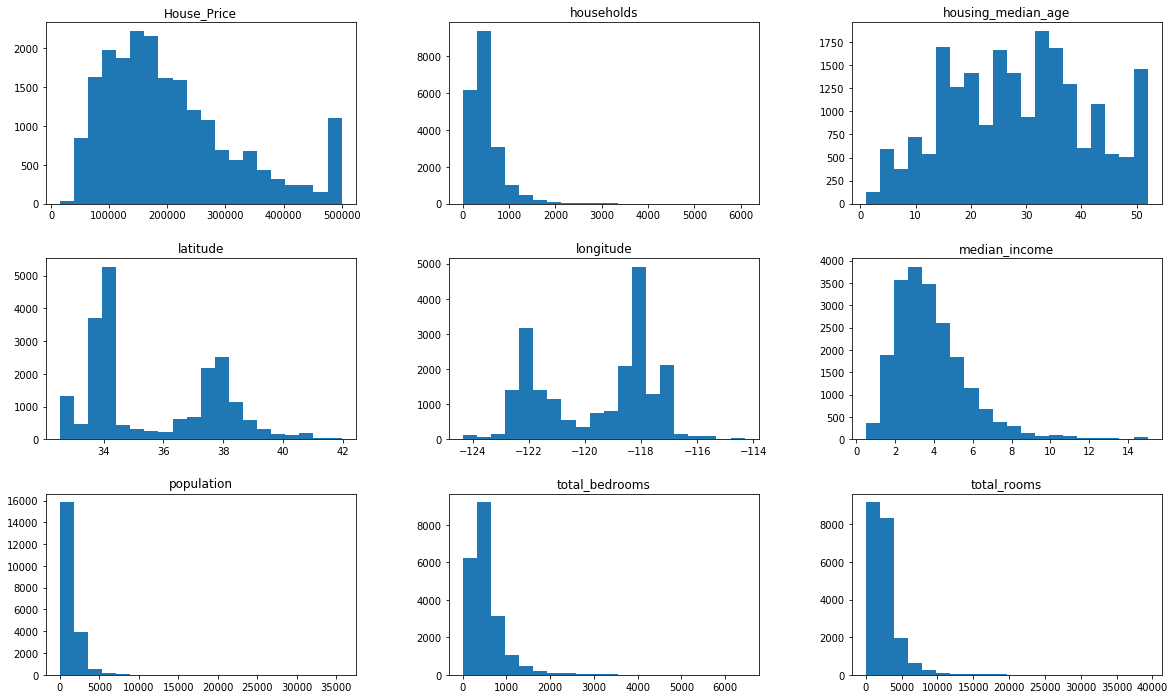

In [66]:
## Exploratory data analysis


Cal_H.hist(bins=20, figsize=(20,12), grid=False)


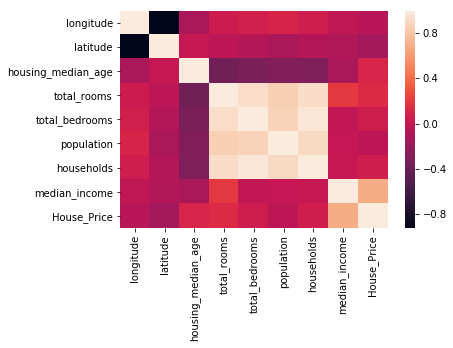

In [68]:

sns.heatmap(Cal_H.corr())

From the correlation heatmap, i can see that the latitude and lonitude are negatively correlated as expected.
but looking at the median income and houseprice column, we see that there is a positive correlation of 0.8
between them, meaning that household with higher incomes tend to go for houses with a higher price value
which makes total sense because, I mean, the can afford it. All columns are perfectly correlated with themselves, obviously,lol.

But something interesting is happening at the middle of the correlation heatmap. We can see that the
total rooms, total bedrooms,population and household columns are highly correlated with themselves.
Meaning that houses with a large number of rooms automaticallly have large number of bedrooms, which in turn can house more people soo it has a higher population and subsequently motre households.

But unlike what we would have thought, houses with more rooms are not automatically sold for more money,
infact, it has a 0 correlation with house price. That is to say the size of the house and the numbere of rooms
it contains does not in anyway influence the price at which the house is sold.

Another interesting find is that the age of the house does not matter too. Wow!

Soo one feature that greatly influences our housprice is the salary of the people. We would get to see more of this in our machine learning prediction. Stay with me...



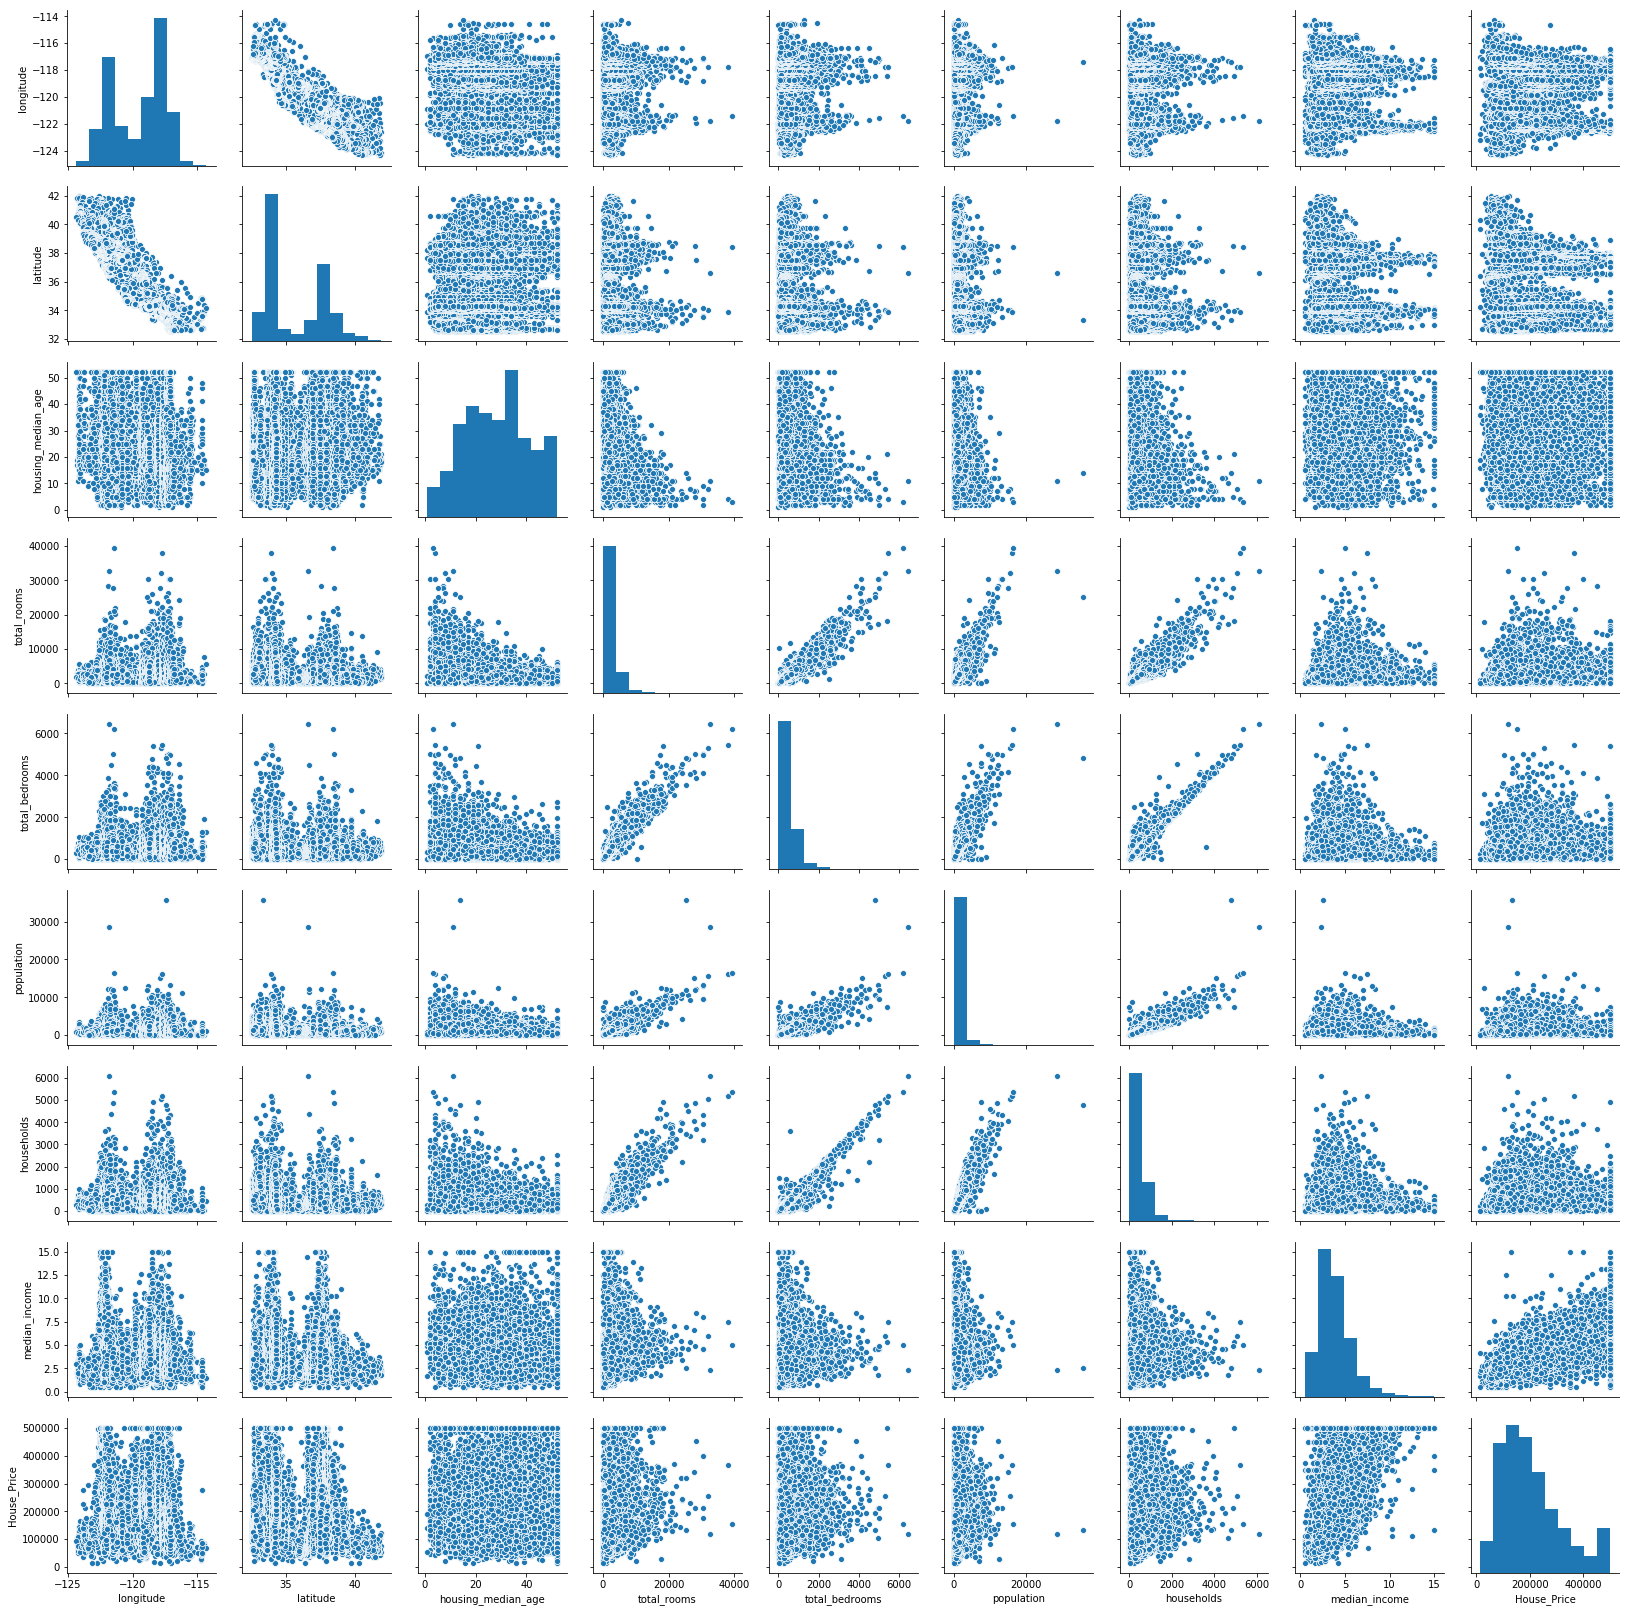

In [70]:
sns.pairplot(data=Cal_H)

In [77]:
#feature engineering

Cal_H.head()

,housing_median_age,total_rooms,total_bedrooms,median_income,House_Price,ocean_proximity
0,41.0,880.0,129.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,3.8462,342200.0,NEAR BAY


In [76]:
Cal_H.drop(columns=["longitude","latitude","population","households"], inplace=True)

KeyError: "['longitude' 'latitude' 'population' 'households'] not found in axis"

In [98]:
Cal_H["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [102]:
#Modelling and prediction

#Preprocessing

#importing needed machine learning libraries

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report



In [105]:
Cal_X=Cal_H.drop(columns="House_Price")

Cal_Y=Cal_H["House_Price"]

In [106]:
Cal_Y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: House_Price, dtype: float64

In [111]:
#Converting categorical column to numerical
Ocean = LabelEncoder()
Cal_X['ocean_proximity'] = Ocean.fit_transform(Cal_X['ocean_proximity'])

In [118]:
Cal_X.head()

,housing_median_age,total_rooms,total_bedrooms,median_income,ocean_proximity
0,41.0,880.0,129.0,8.3252,3
1,21.0,7099.0,1106.0,8.3014,3
2,52.0,1467.0,190.0,7.2574,3
3,52.0,1274.0,235.0,5.6431,3
4,52.0,1627.0,280.0,3.8462,3


In [120]:
# #normalize the dataset
# from sklearn import preprocessing
# X = preprocessing.StandardScaler().fit(Cal_X).transform(Cal_X)
# X[0:5]

In [135]:
#splitting my dataset

X_train, X_test, y_train, y_test = train_test_split(Cal_X,Cal_Y, test_size=0.2, random_state=3)

In [136]:
print('X_train is:', X_train.shape)
print('y_train is :', y_train.shape)
print()
print('X_test is:', X_test.shape)
print('y_test is :', y_test.shape)

X_train is: (16512, 5)
y_train is : (16512,)

X_test is: (4128, 5)
y_test is : (4128,)


In [139]:
#Using the linear regression model and lasso regression model

#using linear model


from sklearn.linear_model import LinearRegression



In [141]:
LR=LinearRegression()

LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [166]:
LR.score(X_train,y_train)

0.5453043244511863

In [169]:
y_predicted = LR.predict(X_test)

y_predicted

array([164012.26417928, 131030.66238312, 180235.85797193, ...,
       316261.1664381 , 264174.8979168 , 180785.44743864])

Linear regression had a score of 0.54 which is just average.Trying out another regression model (lasso regression)

In [185]:
# from numpy import mean
# from numpy import std
# from numpy import absolute
# from pandas import read_csv
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

In [155]:
LA= Lasso(alpha=1.0, normalize=True)

In [156]:
LA.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [158]:
LA.score(X_train,y_train)

0.5452432514228569

#the score is still low. This could be due to not enough correlation between the features we had and the feature we wanted to predict.
or poor choice of models , bad tuning, omo, i dont know again, i'd research more on this and return, until then

Thanks for staying with me. I love you!